# Стратегии факторного инвестирования и методы ценообразования акций российских компаний

_Бузин Глеб_


## Теоретическая справка

Традиционно  выделяются  три  метода  оценки  компании  (бизнеса): 
1. по дисконтированным денежным потокам (так называемый «доходный  метод»);
2. по  активам  (затратный  метод);
3. по  мультипликаторам  (сравнительная  оценка).

### Мультипликаторы и метод оценки

Использование мультипликаторов обусловлено трудностью установления прямого соотношения цен на акции разных ком- паний.

> **Пример**. Допустим, что компании А и Б идентичны абсолютно во всем, за исключением количества акций. Положим, выручка каждой из компаний равна 100 долл., а чистая прибыль — 10 долл.
Теоретически рыночная капитализация, или рыночная стоимость 100% акций, компаний А и Б должна быть одинакова, так как она не зависит от того, на сколько акций поделен капитал компании.
Пусть рыночная капитализация и той и другой компании состав- ляет 100 долл. При этом у компании А в обращении находятся 10 акций, а у компании Б — 20. Долгов ни у той, ни у другой компании нет. В этом случае одна акция компании А стоит 10 долл., а одна акция компании Б — 5 долл. Таким образом, цены акций этих компаний отличаются в два раза, и единственная причина этого — разное количество акций.

_Рыночная капитализация_ – произведение количества выпущенных акций на цену одной акции, сложившуюся на бирже.

Для упрощения стоимостного анализа и придуман метод мультипликаторов (сравнительных коэффициентов), который позволяет изящно абстрагироваться от влияния на цену акции двух упомянутых выше факторов — размера компании и коли- чества акций, на которое поделен ее акционерный капитал.

- P/S (где P — цена (price), а S — объем продаж в денежном выражении (sales), что, как правило, тождественно выручке);
- Р/Е (отношение цены акции к чистой прибыли на одну акцию (earnings per share — EPS)).

Основной сферой применения мультипликаторов является оцен- ка компаний (акций). Оценка на основе мультипликаторов очень популярна среди финансовых аналитиков.

Строго говоря, оценка по мультипликаторам не является основ-ным  методом  оценки  акций  (компаний).  

 При рассмотрении активов как основных и  оборотных  фондов  возможны  все  три  варианта  оценки  —  на  основе  прошлого,  настоящего  и  будущего:
1. оценка на основе будущего — это оценка путем дисконтирования денежного потока, который, однако, генерируется не компани-ей  вообще  и  не  ее  бизнес-единицей,  а  конкретным  объектом.  Например,  можно  предположить,  что  компания  сдаст  свое  здание  или  принадлежащие  ей  земли  в  аренду,  и  дисконтиро-вать  связанные  с  этой  операцией  денежные  потоки;

2. оценка на основе прошлого (или так называемым затратным методом)  представляет  собой  историческую  сумму  вложе-ний  или  цену  приобретения  того  или  иного  объекта  за  вычетом  его  износа.  Например,  оборудование  со  сроком  службы  10  лет  было  куплено  5  лет  назад  за  100  долл.,  сле-довательно, сейчас его стоимость равна 50 долл. (без учета переоценки  из-за  инфляции);
3. оценка  на  основе  настоящего представляет  собой  текущую  рыночную  цену,  по  которой  данный  актив  можно  продать  или купить, или его восстановительную стоимость, т. е. цену, по  которой  такой  же  актив  можно  построить  (с  учетом  из-носа).  Рыночная  цена,  как  правило,  рассчитывается  на  основе стоимости аналогичных объектов, которые продава-лись и цена которых известна. Например, можно определить цену здания, исходя из его площади и цены за 1 кв. м, рас-считанной на основе цен продаж аналогичных зданий. Такая оценка  является  сравнительной. 



## Обзор акций топ-100 компаний Московской биржи по капитализации

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (10,8)})
%config InlineBackend.figure_format = 'retina'

Загрузим данные из **отчета 2019-МСФО** (по международным стандарты финансовой отчётности для МосБиржи):

In [2]:
df = pd.read_csv('df.csv')
df.drop(columns=['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'], inplace=True)
df.drop(100, axis=0, inplace=True)

Приведем числовые данные в нормальный формат:

In [3]:
def cleanup(s):
    for i in range(len(s)):
        try:
            out = s[i].replace(' ', '')
            out = float(out)
        except:
            out = s[i]
        s[i] = out
    return s


df = df.apply(cleanup, axis=0)

df = df.astype({
    'Капит-я, млрд руб': 'float32',
    'EV, млрд руб': 'float32',
    'Выручка': 'float32',
    'Чистая прибыль': 'float32',
    'P/E': 'float32', 'P/S': 'float32', 'P/B': 'float32', 'EV/EBITDA': 'float32'
})

Посмотрим на топ-10 компаний:

In [13]:
df.head(30)

,№,Название,"Капит-я, млрд руб","EV, млрд руб",Выручка,Чистая прибыль,P/E,P/S,P/B,EV/EBITDA,Рентаб. EBITDA,долг/EBITDA,отчет
0,1.0,Роснефть,4591.0,8191.0,8676.0,917.000000,5.000000,0.5,1.100000,3.900000,24%,1.7,2019-МСФО
1,2.0,Газпром,4494.0,7662.0,7659.0,1203.000000,3.700000,0.6,0.300000,4.100000,24%,1.7,2019-МСФО
2,3.0,НОВАТЭК,3637.0,3736.0,852.0,245.000000,14.800000,4.3,2.200000,8.100000,54%,0.2,2019-МСФО
3,4.0,ГМК Норникель,3616.0,4039.0,878.0,375.600006,9.600000,4.1,16.200001,7.900000,59%,0.8,2019-МСФО
4,5.0,Лукойл,3272.0,3310.0,7841.0,640.200012,5.100000,0.4,0.800000,2.700000,16%,0.0,2019-МСФО
5,6.0,Полюс золото,2008.0,2211.0,258.0,124.199997,16.200001,7.8,17.900000,12.800000,67%,1.2,2019-МСФО
6,7.0,Яндекс,1650.0,1562.0,175.0,23.500000,70.099998,9.4,12.500000,30.600000,29%,-1.7,2019-МСФО
7,8.0,Сургутнефтегаз,1544.0,-1819.0,1815.0,106.000000,14.600000,0.9,0.300000,-3.900000,26%,-7.2,2019-МСФО
8,9.0,Газпромнефть,1525.0,2038.0,2485.0,400.000000,3.800000,0.6,0.800000,2.900000,29%,0.7,2019-МСФО
9,10.0,Транснефть,1230.0,1784.0,1064.0,179.000000,6.900000,1.2,0.600000,3.700000,46%,1.1,2019-МСФО


### Показатели:

- **Капит-я, млрд руб** - Рыночная капитализация - произведение количества выпущенных акций на цену одной акции, сложившуюся на бирже.
- **EV, млрд руб** - Enterprise Value - это финансовый показатель, используемый при оценке стоимости компании в момент слияния (поглощения) или для формирования общей картины по отрасли/рынку. Этот показатель учитывает долговую нагрузку и неоперационные активы (денежные средства и инвестиции). Рассчитать Enterprise Value можно по формуле:

$$ EV = P +  Debt — Cash = P + Net Debt $$

> P — это рыночная капитализация компании. \
Debt — это долг компании. \
Cash — это деньги, и то что можно быстро перевести в деньги. \
Net Debt — чистый долг компании.
- **Выручка**
- **Чистая прибыль**
- **P/E** - Мультипликатор цена чистая прибыль позволяет оценить перспективность покупки акций различных компаний для получения прибыли в будущем. Смысл коэффициента заключается в том, сколько денег инвесторы готовы платить сегодня  на каждый доллар (рубль, евро) получаемой прибыли завтра. Если по простому, то коэффициент P/E показывают за сколько лет окупятся ваши вложения в акции компаний. Рассчитывается значение P/E как отношение текущей рыночной стоимости компании к ее чистой прибыли.

$$ P/E = \frac{Цена (Price)}{Чистая\space прибыль (Earnings\space Ratio)} $$

- **P/S** - Коэффициент Цена/Выручка (Price/Sales Ratio, P/S) оценивает компанию по объему продаж и дает представление о том, сколько инвестор платит за 1 рубль (доллар) ее выручки. Рассчитывается данный показатель как:

$$ P/S = \frac{Рыночная\space стоимость\space компании}{Объем\space продаж} $$

- **P/B** - Коэффициент P/B показывает отношение рыночной капитализации компании (Price) к ее балансовой стоимости активов (Book Value Ratio). Иногда обозначают как P / BV. Балансовая стоимость — термин из бухгалтерского учета. Оценка имущества компании за минусом всех ее обязательств.

>Коэффициент P/B показывает на какую сумму инвестор получает имущества компании на каждый вложенный  им доллар. \
P/B =1  (стоимость компании равна балансовой стоимости); \
P/B < 1 ( означает, что рынок оценивает компанию ниже ее имущества); \
P/B > 1 (люди готовы платить больше, чем стоит компания).


- **EV/EBITDA** - Enterprise value/Earnings before Interest, Taxes, Depreciation and Amortization - Данный коэффициент относится к группе доходных мультипликаторов и показывает за какой период времени неизрасходованная на амортизацию и уплату процентов и налогов прибыль компании окупит стоимость приобретения компании.
- **Рентаб. EBITDA** - рентабельность EBITDA  (EBITDA Margin) — рентабельность по показателю EBITDA, то есть отношение EBITDA/выручка. Это относительный показатель. Данный коэффициент отражает прибыльность компании до уплаты процентов, налогов и амортизации. 
- **долг/EBITDA** - Чистый долг = общий долг – доступные денежные средства.

Посмотрим парные отношения в наборе данных. Каждая числовая переменная в данных будет совместно использоваться по осям Y в одной строке и по осям X в одном столбце. Диагональные графики - графики одномерного распределения, чтобы показать предельное распределение данных в каждом столбце:

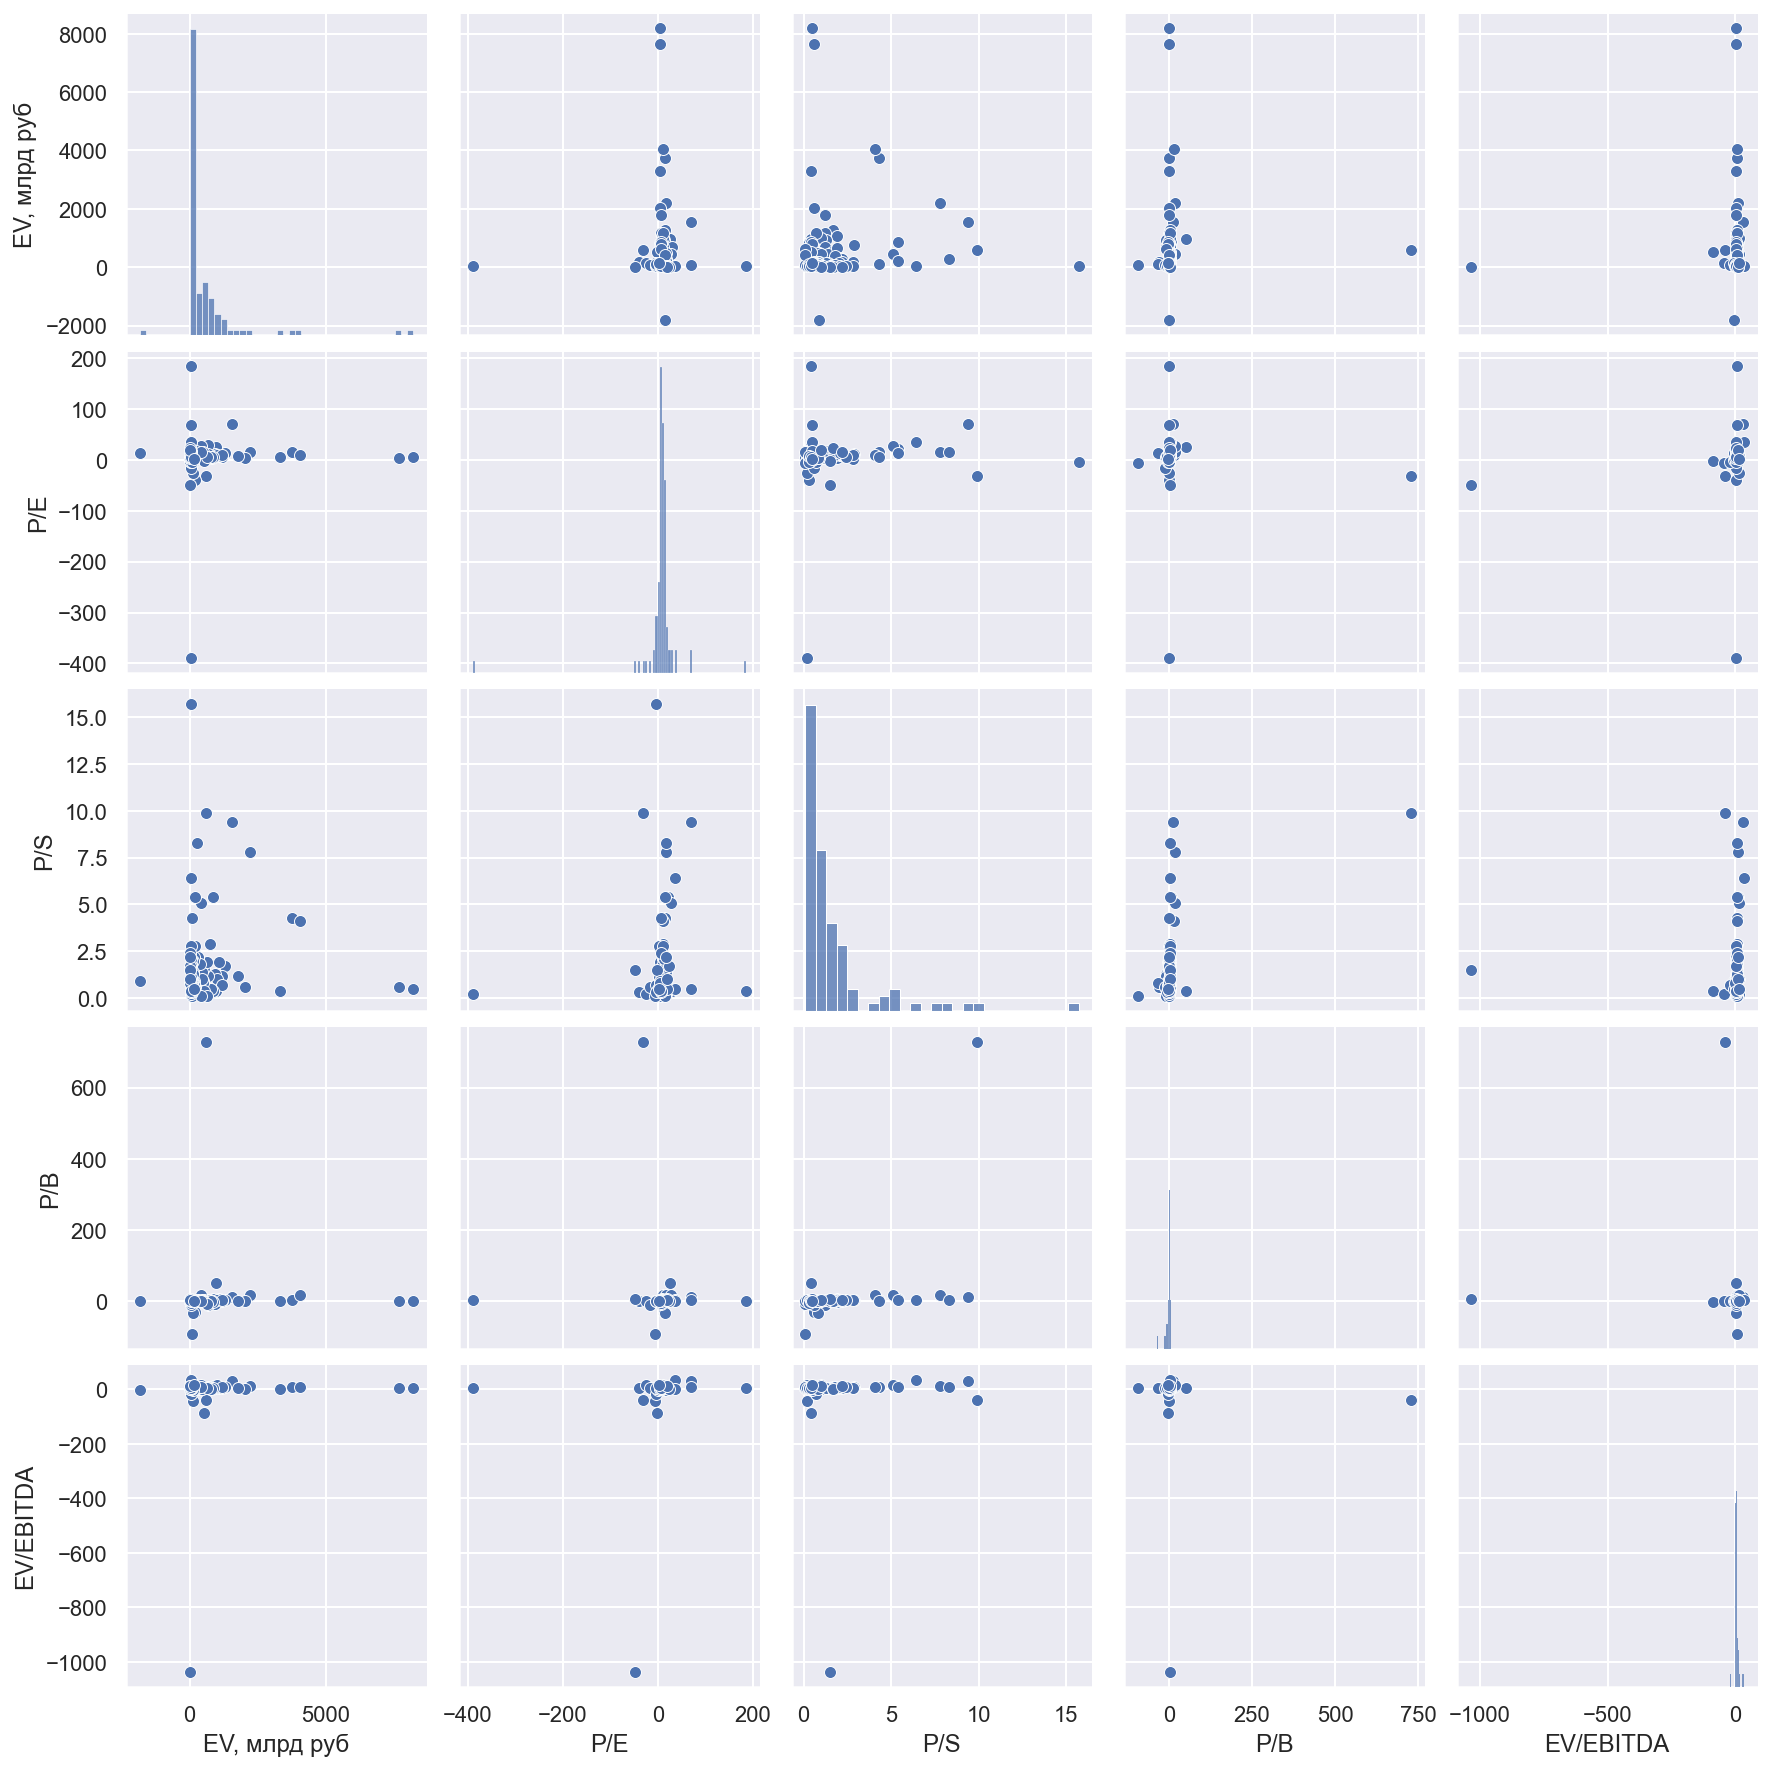

In [5]:
some = df[['EV, млрд руб', 'P/E', 'P/S', 'P/B', 'EV/EBITDA']]
sns.pairplot(data=some);

Посмотрим на зависимость коррелируемость показателей:

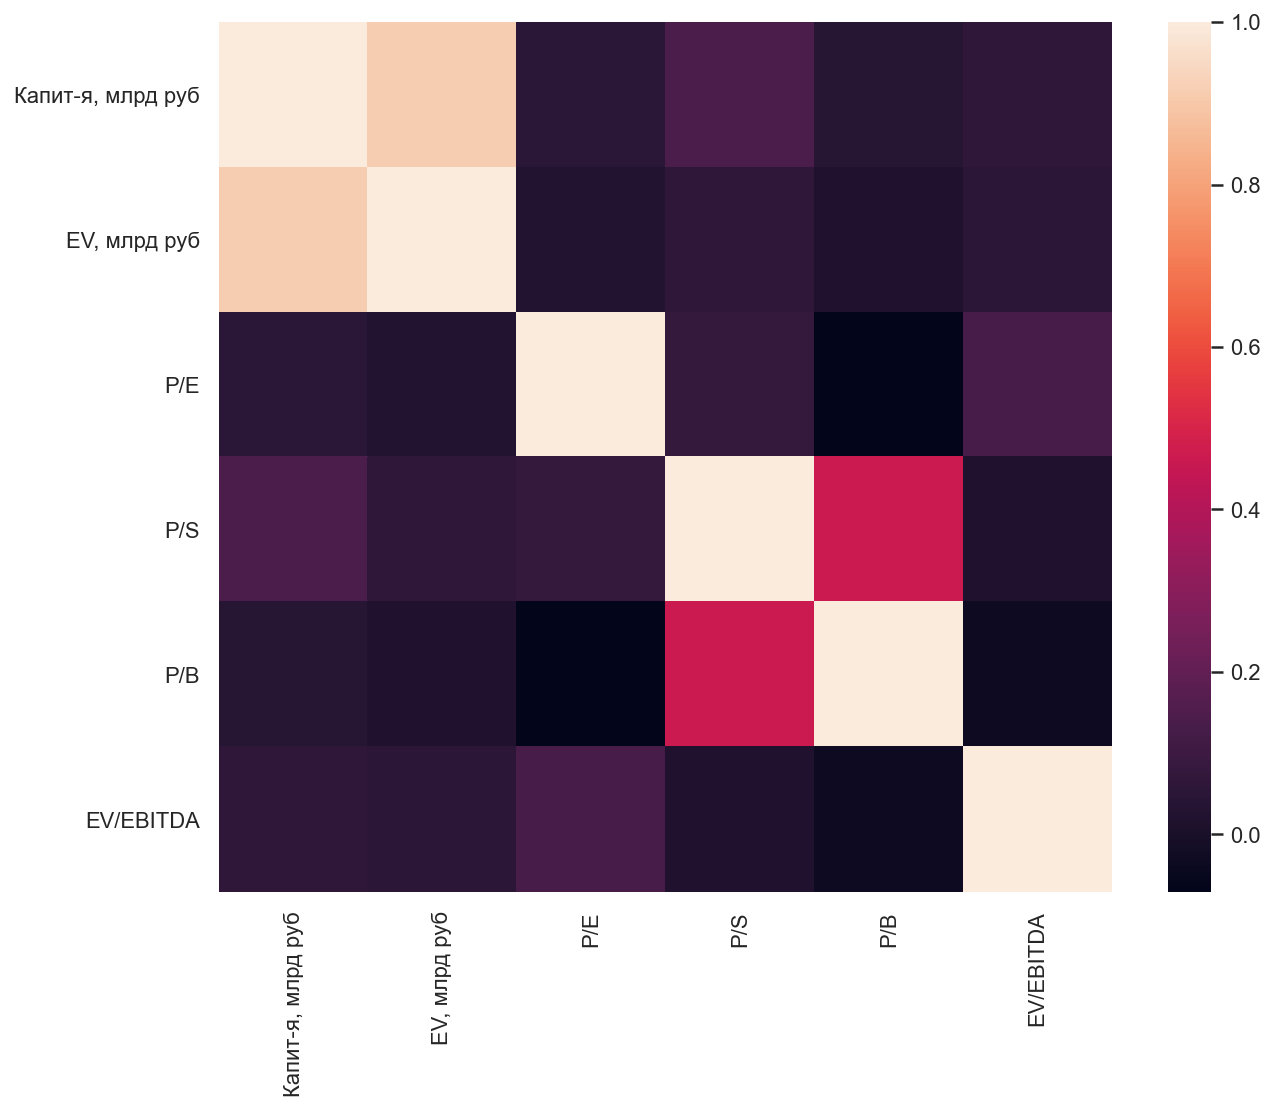

In [6]:
some = df[['Капит-я, млрд руб', 'EV, млрд руб', 'P/E', 'P/S', 'P/B', 'EV/EBITDA']]
sns.heatmap(data=some.corr());

*Чем меньше значение мультипликатора, тем более недооценена бумага

## МТС и МЕГАФОН

In [12]:
mm = df.loc[(df['Название'] == 'МТС') | (df['Название'] == 'Мегафон')]
mm = mm.drop(columns=['Рентаб. EBITDA', 'долг/EBITDA', 'отчет'])
mm

,№,Название,"Капит-я, млрд руб","EV, млрд руб",Выручка,Чистая прибыль,P/E,P/S,P/B,EV/EBITDA
16,17.0,МТС,636.0,941.0,476.0,54.200001,11.7,1.3,-7.5,4.5
24,25.0,Мегафон,397.0,691.0,336.0,35.200001,11.3,1.2,-9.7,5.6


Доходность МТС: 11%, доходность Мегафон: 10%

MTSS							MFON


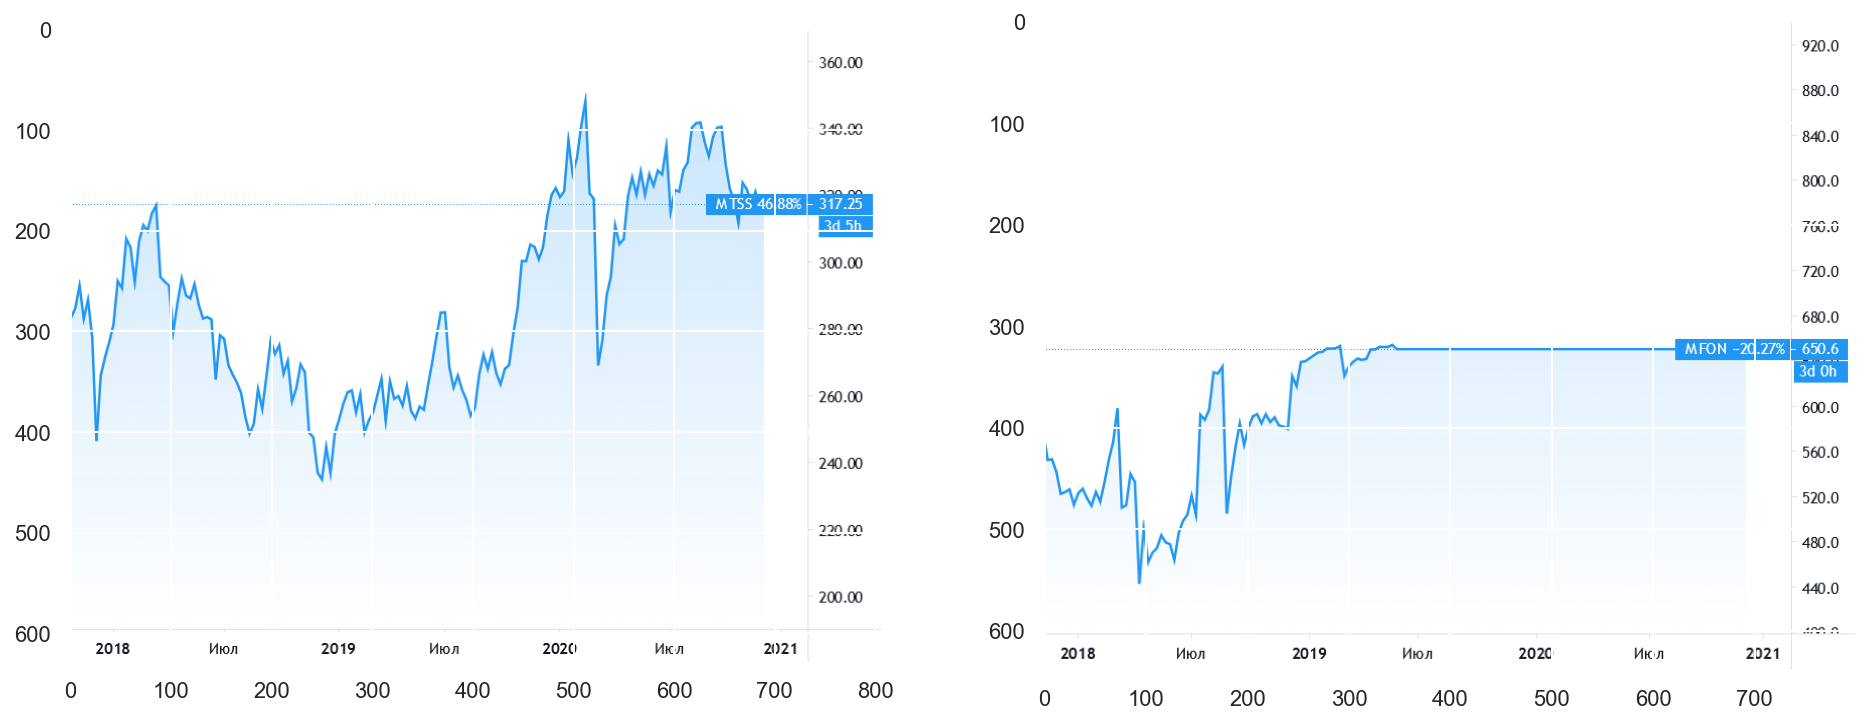

In [8]:
import matplotlib.image as mpimg
from matplotlib import rcParams
rcParams['figure.figsize'] = 16 ,10
img_A = mpimg.imread('MTSS.png')
img_B = mpimg.imread('MFON.png')

print('MTSS' + '\t'*7 + 'MFON')

fig, ax = plt.subplots(1,2);
ax[0].imshow(img_A);
ax[1].imshow(img_B);


*_07 июн 2019 [«МегаФон» окончательно ушел с Московской биржи](https://quote.rbc.ru/news/article/5ae098a62ae5961b67a1c443)_


# TODO:

1. Почему в России заниженные мультипликаторы по сравнению с миров (P/S например) и с чем это связано - с отраслевыми различиями или с внутреотраслевыми?
2. Взять данные с Bloomberg или с сайти мосбиржи за несколько лет (за 10 лет например)